In [11]:
#basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#!pip3 install xlrd

In [105]:
dat = pd.read_excel('../DS_NLP_Assignment/sentences_with_sentiment.xlsx')
print('### RAW DATA ###')
dat
print('  ++++++ NOT SHOWN DUE TO PRIVACY POLICIES   ++++++ ')

### RAW DATA ###
  ++++++ NOT SHOWN DUE TO PRIVACY POLICIES   ++++++ 


In [104]:
## enriching the data with some based side information
num_words = [len(s.split()) for s in dat['Sentence']]
dat['num_words'] = num_words


class_names = ['Positive',  'Neutral', 'Negative']
label_str = np.array(['          ' for a in range(len(dat))])
for cl in class_names:
    label_str[dat[cl]==1] = cl
dat['label_str'] = label_str

dat
print('  ++++++ NOT SHOWN DUE TO PRIVACY POLICIES   ++++++ ')

  ++++++ NOT SHOWN DUE TO PRIVACY POLICIES   ++++++ 


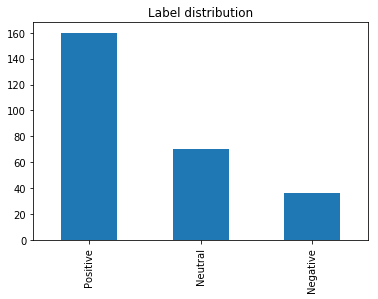

In [70]:
#assert that labels are one-hot encoded
assert np.all((dat['Positive']+dat['Negative'] + dat['Neutral']) ==1)

labels = dat[class_names].sum().plot(kind='bar', title='Label distribution')

## Labels distribution is very unbalanced with Positive sentiment dominating

Text(0.5,1,'Lenghth of sentences, colored by class_label')

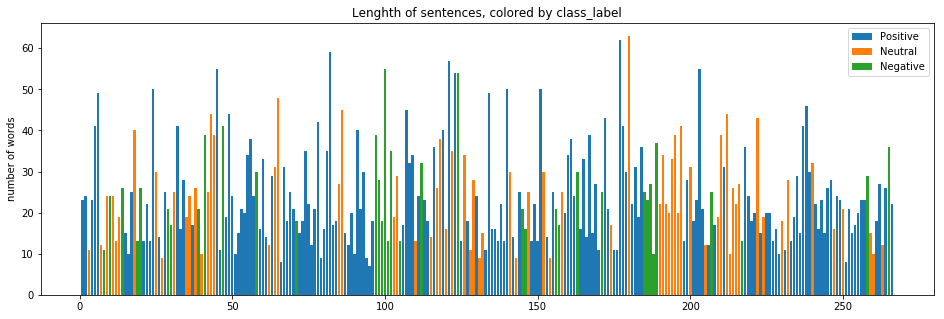

In [78]:
plt.figure(figsize=[16,5])
for cl in class_names:
    _d = dat[dat['label_str']== cl]
    plt.bar(_d['ID'], _d['num_words'])
plt.legend(class_names)
plt.ylabel('number of words')
plt.title('Lenghth of sentences, colored by class_label')


## Findings from explorative data analysis: 

### Non-random order:
There are some stong indications for a non-random order of the data, since we see that there are blocks of sentences with the class label - see between 180 and 200, were there is a block of negartive and neutral sentences. 
### Length of sentences is not indicative for sentiment
As expected, the length of a sentence does not provide class-relevent information.

In [102]:
## investigating non-random order. Assumption is that neighboring sentences are from the same document

# for i in range(180,200):
#         print(i, ':   ', dat['Sentence'][i])

print('  ++++++ NOT SHOWN DUE TO PRIVACY POLICIES   ++++++ ')

  ++++++ NOT SHOWN DUE TO PRIVACY POLICIES   ++++++ 


## Data is non-IID
The above excerpt of the sentences indicate that all these sentences are related as most of them contain the term  "SMA" (which is likely the abbrevation for "spinal muscular atrophy"). 

Moreover, the sentences with the IDs 186 and 188 both mention the specific abbrevation "PAES", which also indicate that those sentences are occuring in the same context


## Problems due to non-IID samples

Without knowing the origin of the sentences, it is not possible to split the data into valid training/validation and test sets. Certainly, splitting the data randomly will introduce a large bias. A chronological split may be more suitable, however sample size (i.e. number of unique documents) is unknown and it is expected to be very small (<15).


# Loading data from pdf documents

In [107]:
# here, we get text data from pdf documents and thereby extract unlabeled sentences 

def get_sentences_from_pdf(pdf_path):
    os.system('pdftotext -f 3 {}'.format(pdf_path))
    with open(pdf_path.replace('.pdf', '.txt')) as f:
        text = f.read()
    #reformat text: several newlines are also end-of sentence. This is important for Headers 
    text = text.replace('\n\n', '. ')
    # remove remaining single-newlines
    text = text.replace('\n', ' ')
    sentences = text.split('. ')
    # remove sentences with less that 4 words
    sentences = [s for s in sentences if len(s.split())>=4]
    return sentences

unlabeled_data = {}
for filename in ['WC500057122.pdf', 'WC500135744.pdf']:
    unlabeled_data[filename] = get_sentences_from_pdf('../DS_NLP_Assignment/{}'.format(filename))
